In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from coco_caption.pycocotools.coco import COCO
from coco_caption.pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
import os
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
# set up file names and pathes
dataDir='coco'
dataType='train2017'
algName = 'fakecap'
annFile='%s/annotations/ann2017/captions_%s.json'%(dataDir,dataType)
subtypes=['evalImgs', 'eval']
[evalImgsFile, evalFile]= \
['coco_caption/output/captions_%s_%s_%s.json'%(dataType,algName,subtype) for subtype in subtypes]

resFile = os.path.join('coco_caption', 'results', 'captions_val2017_fakefixed.json')

# download Stanford models
# !./get_stanford_models.sh

In [62]:

# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:00.555067
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!


In [63]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 9839, 'reflen': 9811, 'guess': [9839, 8844, 7849, 6854], 'correct': [3539, 806, 170, 61]}
ratio: 1.0028539394556106
Bleu_1: 0.360
Bleu_2: 0.181
Bleu_3: 0.089
Bleu_4: 0.050
computing METEOR score...
METEOR: 0.090
computing Rouge score...
ROUGE_L: 0.257
computing CIDEr score...
CIDEr: 0.059


In [64]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print( '%s: %.3f'%(metric, score))

Bleu_1: 0.360
Bleu_2: 0.181
Bleu_3: 0.089
Bleu_4: 0.050
METEOR: 0.090
ROUGE_L: 0.257
CIDEr: 0.059


ground truth captions
[{'image_id': 262284, 'id': 598045, 'caption': 'A full view of a shower with glass.'}, {'image_id': 262284, 'id': 600628, 'caption': 'A walk in shower with a hand held shower head.'}, {'image_id': 262284, 'id': 601366, 'caption': 'A bathroom shower stall with a shower head.'}, {'image_id': 262284, 'id': 601546, 'caption': 'a glass walled shower in a home bathroom'}, {'image_id': 262284, 'id': 612379, 'caption': 'a see through glass shower in a bathroom '}]


generated caption (CIDEr score 0.3)
[{'image_id': 262284, 'caption': 'bathroom with a sink and a mirror', 'id': 72}]


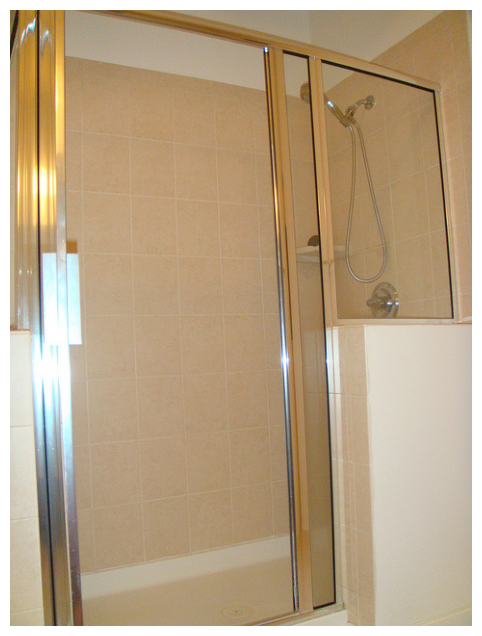

In [65]:

# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print( 'ground truth captions')
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print ('\n')
print ('generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr']))
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread(os.path.join(dataDir, 'images', 'train2017', img['file_name']))
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

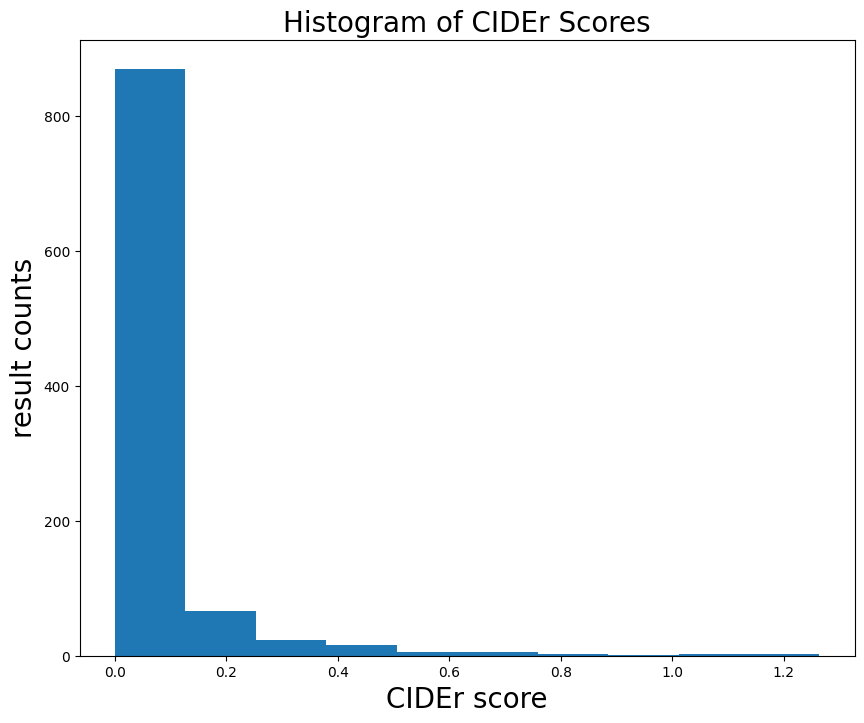

In [66]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [71]:
evalFile

'coco_caption/output/captions_train2017_fakecap_eval.json'

In [72]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))